In [71]:
import numpy as np
import scipy as sp
from scipy import optimize
from scipy import linalg
from numpy.linalg import eig
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [72]:
# 1 punto

In [73]:
#Raices o niveles de energia permitidos
def f(x):
    return x**2-1.0

rs = (sp.optimize.root(f,[-0.6,0.6])).x

print 'Los niveles de energia permitidos son: ',rs

Los niveles de energia permitidos son:  [-1.  1.]


In [74]:
#Autovectores
B = np.array([ [-1/3**0.5,-1/3**0.5+1j/3**0.5],
               [-1/3**0.5-1j/3**0.5,1/3**0.5] ])

va,ve = eig(B)
print 'Los autovectores son:'
print ve[0],ve[1]

Los autovectores son:
[ 0.88807383+0.j         -0.32505758+0.32505758j] [ 0.32505758+0.32505758j  0.88807383+0.j        ]


In [75]:
#2 Punto

In [142]:
#Funcion f
def F(teta):
    g = 9.8
    l = 0.5
    return -g/l*np.sin(teta)

In [100]:
#Metodo de Euler
def Euler(f,x0,v0,a,b,h):
    
    lim = int ((b - a)/h)
    
    ws = []
    ys = []
    
    for i in xrange(0,lim):
        w1 = v0 + h*f(x0)
        ws.append(w1)
        
        y1 = x0 + h*w1
        ys.append(y1)
        
        v0 = w1
        x0 = y1
        
    Sol = [ys,ws]   
    
    return Sol

In [151]:
#Solucion al pendulo simple

#Datos de posicion (radianes) y velocidad iniciales 
x0 = 1.0 #Radianes
v0 = 0.0

#Tiempo de integracion (de a hasta b) y paso h para la misma
a = 0.0
b = 10.0
h = 0.01

#Posicion y velocidad
Pos = Euler(F,x0,v0,a,b,h)[0]
Vel = Euler(F,x0,v0,a,b,h)[1]

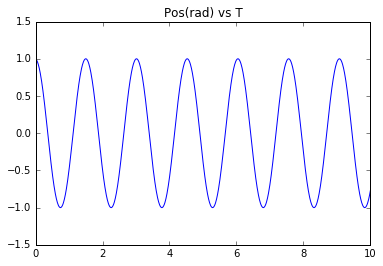

In [152]:
#Graficos
N = int ((b - a)/h)
T = np.linspace(0,10.,N)

#Posicion
plt.plot(T,Pos)
plt.title('Pos(rad) vs T')

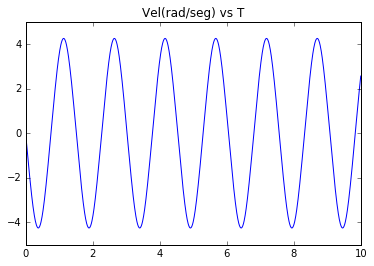

In [153]:
#Velocidad
plt.plot(T,Vel)
plt.title('Vel(rad/seg) vs T')

In [154]:
#Energías

In [155]:
#Datos del pendulo y gravedad
m = 0.1
g = 9.8
l = 0.5

Ec = []
Ep = []
Et = []

for i in xrange(0,N):
    #Energia cinetica
    e_c = 0.5*m*(Vel[i]*l)**2
    Ec.append(e_c)
    
    #Energia potencial. El nivel de referencia es el punto mas bajo del movimiento.
    e_p = m*g*l*(1.0-np.cos(Pos[i]))
    Ep.append(e_p)
    
    #Energia total
    Et.append(e_c + e_p)

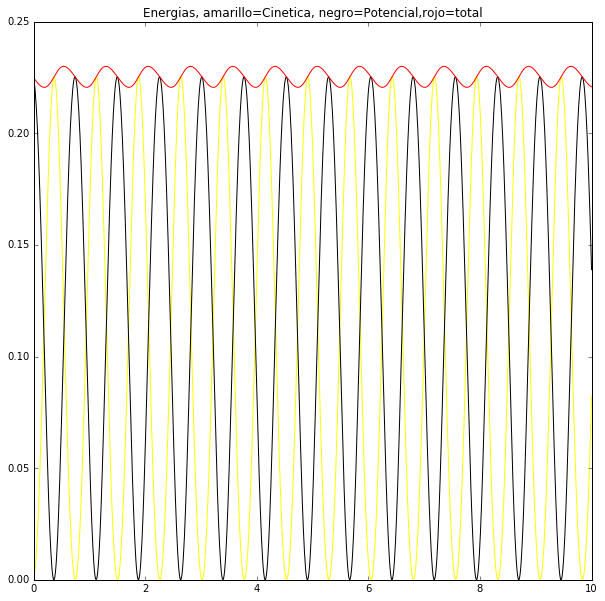

In [156]:
#Grafica de las energias
plt.figure(figsize=(10,10))
plt.plot(T,Ec,'yellow')
plt.plot(T,Ep,'black')
plt.plot(T,Et,'red')
plt.title('Energias, amarillo=Cinetica, negro=Potencial,rojo=total')

In [157]:
#Conclusiones
"""
Tanto la energia potencial como cinetica varian durante el movimiento del pendulo de manera 
oscilatoria, inicialmente toda la energia es potencial, luego de un cuarto de ciclo esta es solo 
cinetica. La energia total del sistema (en rojo) teoricamente de debe conservar pues no hay fuerzas 
disipativas actuando sobre el sistema pero vemos en el grafico que esta cambia muy levemente
durante el movimiento por lo cual se debe concluir que el metodo de integracion usado no mantine
constante la energia del sistema o mejora la constancia de la energia al disminuir h.
"""

'\nTanto la energia potencial como cinetica varian durante el movimiento del pendulo de manera \noscilatoria, inicialmente toda la energia es potencial, luego de un cuarto de ciclo esta es solo \ncinetica. La energia total del sistema (en rojo) teoricamente de debe conservar pues no hay fuerzas \ndisipativas actuando sobre el sistema pero vemos en el grafico que esta cambia muy levemente\ndurante el movimiento por lo cual se debe concluir que el metodo de integracion usado no mantine\nconstante la energia del sistema o mejora la constancia de la energia al disminuir h.\n'